<a href="https://colab.research.google.com/github/salah-2024-analyticshub/binary-text-classification-compare-models/blob/main/DL_Text_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.15.0
Eager mode:  True
Hub version:  0.16.1
GPU is NOT AVAILABLE


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/imdb_reviews.csv")
dataset = dataset.rename(columns={'review': 'sentence', 'sentiment': 'flag'})
dataset['flag'] = dataset['flag'].str.replace('positive', '1')
dataset['flag'] = dataset['flag'].str.replace('negative', '0')
dataset.head()

,sentence,flag
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [5]:
X = dataset[['sentence']].to_numpy()
y = dataset[['flag']].to_numpy()
X[:2]

array([["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train[:2]

array([["That's about the only redeeming quality in a movie that otherwise insults the viewer's intelligence by losing track of time, plot, and reason for being produced.<br /><br />Plus, how that guy with the glasses ever got a gig in Hollywood is beyond me."],
       ['Even if I had not read Anne Rice\'s "Queen of the Damned" from the "Vampire Chronicles," I probably would still have thought this movie was just awful.<br /><br />It was tasteless, plot-less, it made absolutely no sense at all. I sat for a while pondering the plot disassociated from the book, and the longer I thought of it, the worse it was. To associate it in any way with the prior Chronicles film is ridiculous as it is ridiculously inconsistent with that movie, let alone the book. The bare few ideas taken from Rice\'s genius in "The Vampire Chronicles" were butchered and ridiculed.<br /><br />It is an absolute insult to Anne Rice fans everywhere and such a pathetic excuse for a legacy in being Aaliyah\'s last film. T

In [19]:
y_train[:10]

array([['0'],
       ['0'],
       ['1'],
       ['1'],
       ['0'],
       ['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1']], dtype=object)

In [20]:
X_train = np.array([item for sublist in X_train for item in sublist])
X_test = np.array([item for sublist in X_test for item in sublist])
X_train[:2]

array(["That's about the only redeeming quality in a movie that otherwise insults the viewer's intelligence by losing track of time, plot, and reason for being produced.<br /><br />Plus, how that guy with the glasses ever got a gig in Hollywood is beyond me.",
       'Even if I had not read Anne Rice\'s "Queen of the Damned" from the "Vampire Chronicles," I probably would still have thought this movie was just awful.<br /><br />It was tasteless, plot-less, it made absolutely no sense at all. I sat for a while pondering the plot disassociated from the book, and the longer I thought of it, the worse it was. To associate it in any way with the prior Chronicles film is ridiculous as it is ridiculously inconsistent with that movie, let alone the book. The bare few ideas taken from Rice\'s genius in "The Vampire Chronicles" were butchered and ridiculed.<br /><br />It is an absolute insult to Anne Rice fans everywhere and such a pathetic excuse for a legacy in being Aaliyah\'s last film. Trul

In [21]:
y_train = np.array([item for sublist in y_train for item in sublist])
y_test = np.array([item for sublist in y_test for item in sublist])
y_train[:10]

array(['0', '0', '1', '1', '0', '1', '1', '1', '1', '1'], dtype='<U1')

In [22]:
X_train[0:2]

array(["That's about the only redeeming quality in a movie that otherwise insults the viewer's intelligence by losing track of time, plot, and reason for being produced.<br /><br />Plus, how that guy with the glasses ever got a gig in Hollywood is beyond me.",
       'Even if I had not read Anne Rice\'s "Queen of the Damned" from the "Vampire Chronicles," I probably would still have thought this movie was just awful.<br /><br />It was tasteless, plot-less, it made absolutely no sense at all. I sat for a while pondering the plot disassociated from the book, and the longer I thought of it, the worse it was. To associate it in any way with the prior Chronicles film is ridiculous as it is ridiculously inconsistent with that movie, let alone the book. The bare few ideas taken from Rice\'s genius in "The Vampire Chronicles" were butchered and ridiculed.<br /><br />It is an absolute insult to Anne Rice fans everywhere and such a pathetic excuse for a legacy in being Aaliyah\'s last film. Trul

In [23]:
model = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(X_train[len(X_train)-2:len(X_train)])

<tf.Tensor: shape=(2, 128), dtype=float32, numpy=
array([[ 1.59491873e+00,  1.41812369e-01,  1.10425450e-01,
         3.43806893e-01, -3.98621196e-03, -1.65086761e-02,
         4.88439649e-01, -2.08734557e-01, -1.74762309e-01,
         2.89675981e-01,  1.54918790e-01, -5.35906494e-01,
        -3.82214218e-01, -2.47158006e-01, -1.56071171e-01,
         1.71942115e-01, -1.54007420e-01, -3.34906988e-02,
        -1.93091333e-01,  1.13212538e+00,  2.07557783e-01,
         1.44015029e-01, -1.50931654e-02,  2.05680475e-01,
        -4.69845049e-02, -2.74139911e-01,  1.22281484e-01,
        -9.68960952e-03,  3.75777036e-02,  5.09425364e-02,
        -1.26542062e-01,  2.57640749e-01,  1.95935190e-01,
        -1.27834588e-01,  3.48216653e-01, -5.26366420e-02,
        -1.52312502e-01, -2.68741041e-01, -2.54206896e-01,
         3.73292774e-01, -1.83248341e-01, -3.88102941e-02,
        -4.62608784e-03, -2.80617625e-02,  6.80334270e-02,
         1.41570479e-01,  1.67977229e-01,  2.09178496e-02,
      

In [24]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dense_2 (Dense)             (None, 16)                2064      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 124644769 (475.48 MB)
Trainable params: 124644769 (475.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [27]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

history = model.fit(
    X_train,
    y_train,
    epochs=3,
    batch_size=512,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/3
79/79 [==============================] - 337s 4s/step - loss: 0.0842 - accuracy: 0.9750 - val_loss: 0.2659 - val_accuracy: 0.8983
Epoch 2/3
79/79 [==============================] - 329s 4s/step - loss: 0.0492 - accuracy: 0.9886 - val_loss: 0.2838 - val_accuracy: 0.8986
Epoch 3/3
79/79 [==============================] - 332s 4s/step - loss: 0.0275 - accuracy: 0.9957 - val_loss: 0.3231 - val_accuracy: 0.8959


In [28]:
results = model.evaluate(X_test, y_test)
print(results)

313/313 [==============================] - 184s 585ms/step - loss: 0.3231 - accuracy: 0.8959
[0.3231056332588196, 0.8959000110626221]


In [29]:
predictions = model.predict(X_train[:10])

1/1 [==============================] - 1s 843ms/step


In [30]:
print(y_train[:10])

[0. 0. 1. 1. 0. 1. 1. 1. 1. 1.]


In [31]:
print(predictions[:10])

[[ -4.9437504]
 [-10.021358 ]
 [ 12.923259 ]
 [  6.949359 ]
 [ -8.317462 ]
 [  5.921585 ]
 [  2.9752421]
 [  4.5743437]
 [  7.046691 ]
 [  8.744713 ]]


In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

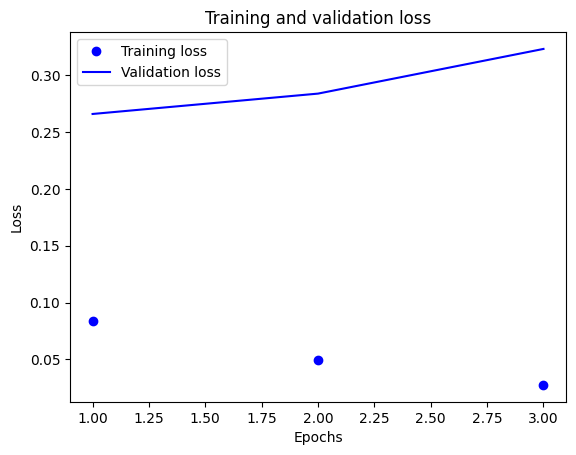

In [34]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

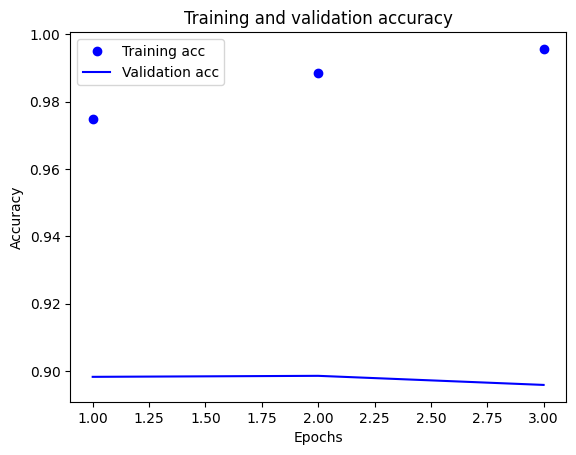

In [35]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()